DATA LOADING and Cleaning

In [26]:
# Install all required packages using conda (safer on Mac & Anaconda)
!conda install -y -c conda-forge pyarrow fsspec huggingface_hub datasets
!conda install -y -c conda-forge pyarrow pandas --force-reinstall
!pip install numpy pandas matplotlib scikit-learn statsmodels

Jupyter detected...
2 channel Terms of Service accepted
Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 25.7.0
    latest version: 25.9.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.

Jupyter detected...
2 channel Terms of Service accepted
Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 25.7.0
    latest version: 25.9.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /opt/anaconda3/envs/truthfulqa

  added / updated specs:
    - pandas
    - pyarrow





Preparing transaction: done
Verifying transaction: done
Executing transaction: done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 12.6 MB/s  0:00:00 eta 

In [31]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

In [36]:
import pandas as pd
df1 = pd.read_parquet("hf://datasets/truthfulqa/truthful_qa/generation/validation-00000-of-00001.parquet")
import pandas as pd
df2 = pd.read_parquet("hf://datasets/truthfulqa/truthful_qa/multiple_choice/validation-00000-of-00001.parquet")

df1.to_csv("truthful_qa_validation.csv", index=False)
df2.to_csv("truthful_qa_validation.csv", index=False)

df1['ai_correct'] = df1.apply(lambda row: row['best_answer'] in row['correct_answers'], axis=1)


In [58]:
from datasets import load_dataset
ds = load_dataset("truthfulqa/truthful_qa", "generation")

hedging_words = ['maybe', 'might', 'could', 'possibly', 'seems', 'appears', 'suggests', 'may',
    'perhaps', 'probably', 'likely', 'presumably', 'assume', 'assumes', 'indicates',
    'apparently', 'arguably', 'tends', 'potentially', 'often', 'sometimes', 'can', 
    'seem', 'think', 'estimated', 'considered', 'speculate', 'roughly'
]
certainty_words = [
    'definitely', 'certainly', 'absolutely', 'clearly', 'undoubtedly', 'surely',
    'yes', 'no', 'nothing', 'never', 'is', 'are', 'will', 'must', 'cannot',
    'always', 'every', 'all', 'without a doubt', 'it is clear', 'proven', 'true', 'fact', 'obviously'
]

In [61]:
def count_words(text, word_list):
    text = str(text).lower() # made lowercase to avoid case mismatches
    return sum(text.count(word.lower()) for word in word_list)
    
df1['Hedging_words_count'] = df1['best_answer'].apply(lambda x: count_words(x, hedging_words))
df1['Certainty_markers_count'] = df1['best_answer'].apply(lambda x: count_words(x, certainty_words))

DATA VISUALIZATION

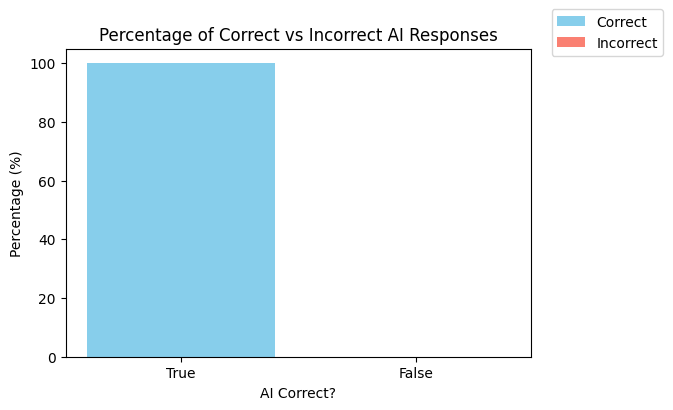

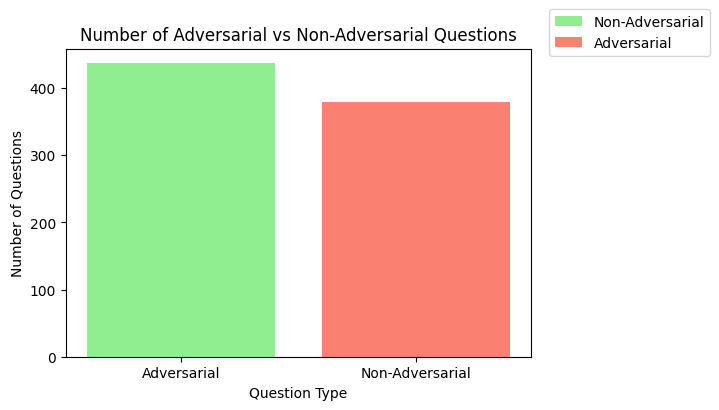

In [57]:
#Outcome Variable Plots
counts = df1['ai_correct'].value_counts()
counts = counts.reindex([True, False], fill_value=0)  # add False with 0 if missing
percentages = counts / counts.sum() * 100
plt.figure(figsize=(6,4))
plt.bar(['True', 'False'], percentages.values, color=['skyblue', 'salmon'], label=['Correct', 'Incorrect'])
plt.ylabel('Percentage (%)')
plt.xlabel('AI Correct?')
plt.title('Percentage of Correct vs Incorrect AI Responses')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.15))
plt.show()

#Key Explanatory Variable Plots
type_counts = df1['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values, color=['lightgreen','salmon'], label=['Non-Adversarial', 'Adversarial'])
plt.xlabel('Question Type')
plt.ylabel('Number of Questions')
plt.title('Number of Adversarial vs Non-Adversarial Questions')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1.15))
plt.show()